首先是导入MerkleTree

In [1]:
from MerkleTree import *
import random

导入成功之后，我们可以构建一棵最基本的树~

构建了个寂寞


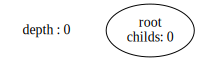

In [2]:
# 构建一颗Merkle树
mt = MerkleTree()

# 构建数据 -> nodeData
nodeData = []

# 构建一棵树，方法选择 imbalance
mt.build_merkle_tree(nodeData, way='imbalance')

# 展示
mt.show()

这里我们看到，我们初始化来了一棵最基本的树（或树桩），左侧显示的是这棵树的高度    
我们其实可以向这棵树中添加数据，如下所示

check Node(value=root, prime=359, hash=)
节点构造完成： Node(value=50, prime=211, hash=87ef87b9cce0c3e322ad4e6b72a3b74f051db0bc4d54d704c8a579e650b26b49)


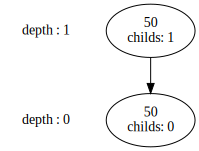

In [3]:
# 随机构建一个数据
num = random.randint(1,99)

# 添加到树中
mt.add(str(num))

# 展示
mt.show()

check Node(value=50, prime=211, hash=b73d99bf13ecf8f73b8b27704fac9bf1a4539024919d386756b63a0aa0a13b4d)
节点构造完成： Node(value=50, prime=281, hash=350273f7486f66465993f2905638da213cb4b3ac1c9ff6346b1d65a70a0b2471)
节点构造完成： Node(value=50, prime=149, hash=ff5be50566476785cb4147e6ee2600b59ae79ac04a2f40e0ae25c40f36b5038b)
check Node(value=50, prime=149, hash=e13ed1a7fee9baa028d1a8d1f08de84e66e3cb88d4fcc8f489622fc2faa7a3b1)
节点构造完成： Node(value=50, prime=547, hash=787f9c39a57f5995687611faa80b1fc2d8a6035e541fbbb3b796ed52109675a2)
节点构造完成： Node(value=50, prime=359, hash=abbc506af4e2fc4b846f03ade0dabd2c6b01e5e969329acdf95fe93e5c8709c7)
check Node(value=50, prime=359, hash=57d92c4f144be5826666cfc5e8afafc62ba9f339d4ebd184414a403aa428dc23)
check Node(value=50, prime=359, hash=179df6bd3df3972b33763c205f3ecd1c7af14a1481ea831c7dd58d399591158b)
节点构造完成： Node(value=50, prime=491, hash=c8f5a5bd51e2b2893b5d925596ffd686ff54fce4dbd59a621e7076adae90f125)
check Node(value=50 50, prime=176269, hash=e9c9386172236ac5dbb0

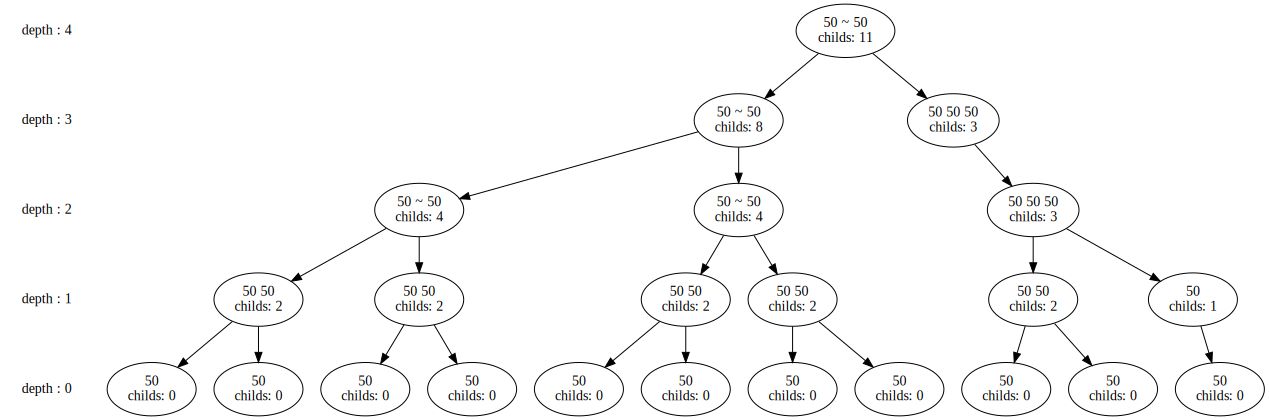

In [4]:
# 多添加一些节点
for _ in range(10):
    num = random.randint(1,99)
    mt.add(str(num))

# 展示
mt.show()

我们看到了，一棵“枝繁叶茂”的树，我们可以在树中标记出新增的节点  
最近一次新增加的节点使用红色进行标注 

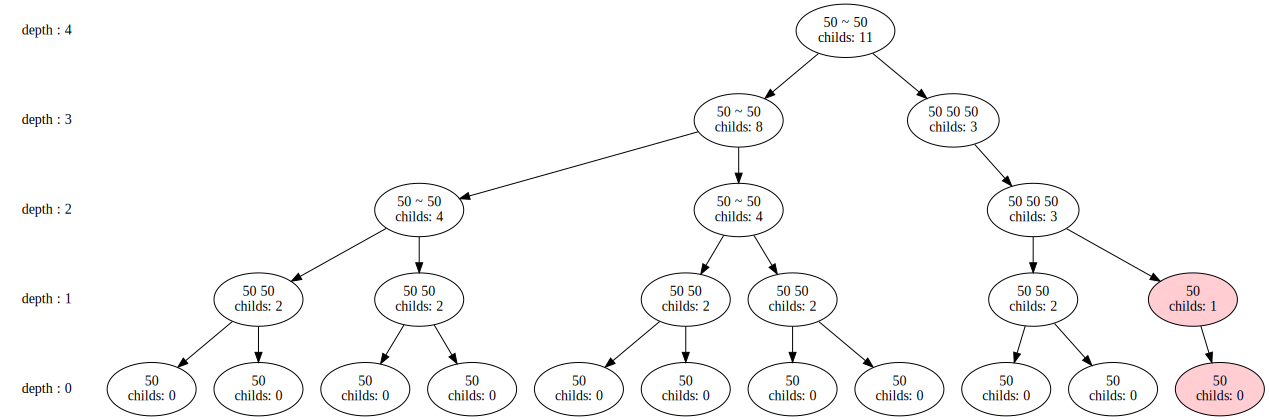

In [5]:
mt.compare()

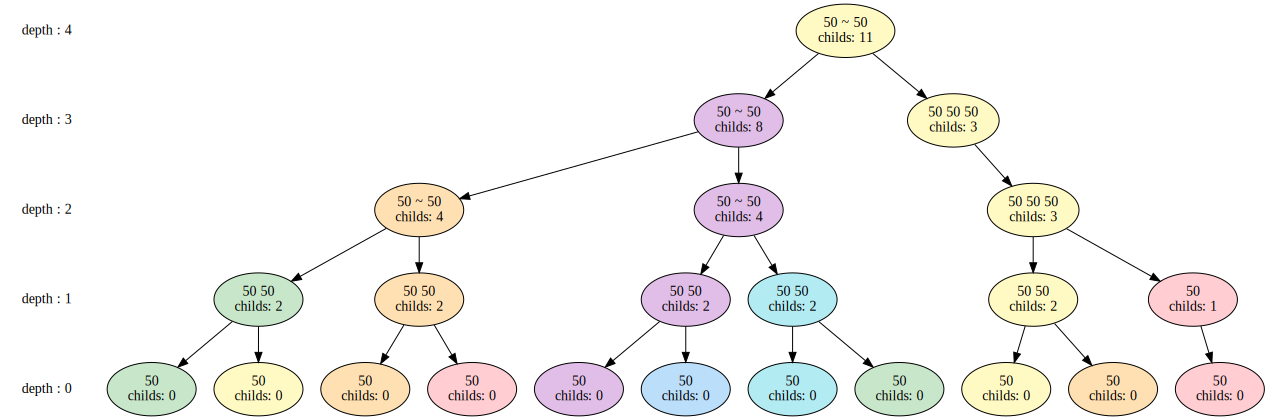

In [15]:
# 显示每一次添加节点的情况，纵向颜色相同的 代表是同一代
mt.compare(showHistory=True)

通过不断地增加节点，我们就可以拥有一棵很茂盛的树    
有时是我们会在这棵树上进行查询的工作，有两个方面：
- 证明一个数据是不是存在
- 证明一个数据是不是不在

分析：
本科学习密码学的时候接触到了 RSA。其中，安全性的关键在于 大素数 $P$ 的因数分解    
我们想要验证一个数是不是这个 $P$ 的因数，很容易；但是想要拆分出这个大素数的所有因数是很困难的。 
所以，我就想使用这个方法：
- 为每一个 “叶子” 随机生成一个素数
- 自下而上的，父节点的 “数” 为子节点 “数” 的乘积。

PS：上一回使用这个思路是在做 **Leetcode 49. 字母异位词分组** 的时候

In [13]:
# 获取整棵树所有数据自己的素数id
mt.getTreePrime()

['211', '281', '149', '547', '359', '491', '331', '79', '103', '347', '631']

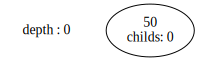

In [16]:
# 根据知道的素数id 就可以
mynode, proofPath = mt.search(359)

# 展示
mt.show(mynode)

proofPath 变量中存放着证明这个节点真实存在的 **Merkle 路径**

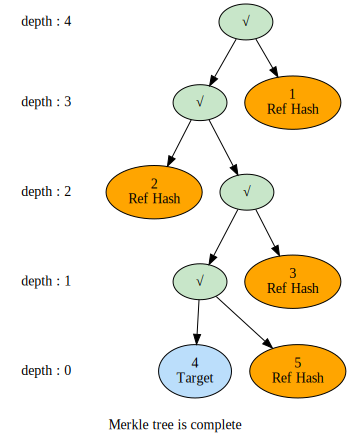

In [17]:
# 验证一下水电费
mt.merkle_path(proofPath)

颜色解释：
- 橙色：表示需要提供给 “请求者” 的作证 hash 值
- 蓝色：“请求者” 想要证明存在的节点
- 绿色：hash 值验证成功的节点

当我们将橙色的节点们发送给 “请求者” 的时候，可能会遇到 数据被篡改 的情况。  
这时候，我们可以再次验证

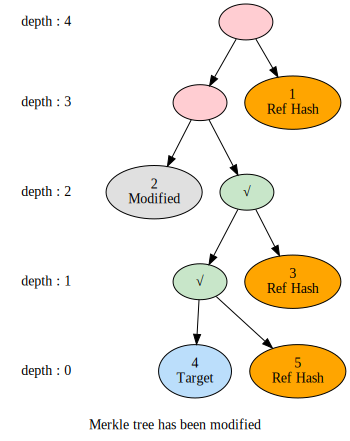

In [18]:
# 篡改第 3 号节点的 hash 数据
proofPath_2 = mt.tampering_test(proofPath,2)

# 验证一下
mt.merkle_path(proofPath_2)

颜色解释：
- 红色：hash 值验证失败的节点
- 灰色：该节点的 hash 值被篡改了